# Variational AutoEncoder (VAE)
Train a VAE on the MNIST handwritten digit dataset. 

This makes use of: the custom Keras model class defined in vaegan.vae.py, our
class for loading the MNIST dataset defined in vaegan.data, and our custom Keras
callback in vaegan.callbacks.

A directory called 'output' will be created to save figures and the trained
model.


In [1]:
# nEpochs=20  # orig, longer, more reasonable amount of training
nEpochs=21  # quick testing during development

## 1. Import 3rd party libraries

In [2]:
import os
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload


2025-05-30 01:02:47.131440: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748584967.155995   23076 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748584967.163500   23076 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748584967.182025   23076 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748584967.182042   23076 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748584967.182045   23076 computation_placer.cc:177] computation placer alr

## 2. Import our own classes (that we will complete together)

In [9]:
# Import our own classes 

current_dir =  '/project/nanocourse/SWE_OOP/train09/Module_2_Materials/04_ExerciseCodeAndInstructions/vaegan'
os.chdir(current_dir)
print("Current working directory:", os.getcwd())

from vaegan.data import MNIST
from vaegan.callbacks import SaveImages
import vaegan.vae
# save_images_callback = SaveImages()


Current working directory: /project/nanocourse/SWE_OOP/train09/Module_2_Materials/04_ExerciseCodeAndInstructions/vaegan


## 3. Show some our data

In [11]:
# Create output directory if it doesn't exist yet.
output_dir = './outputs/mnist_vae'
os.makedirs(output_dir, exist_ok=True)
    
# Instantiate the MNIST class containing our training data.
# data = MNIST()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = tf.expand_dims(x_train, -1)  # shape: (60000, 28, 28, 1)
x_test = tf.expand_dims(x_test, -1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Show some example images and their labels.
data.show_example_images(os.path.join(output_dir, 'example_images.png'))

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

## 4. Construct the model using the python class you completed

In [6]:
pyModule = reload(vaegan.vae)
    
# Create the model. Note that we're using mostly the default arguments, but this is
# where you might want to play around with different loss weights.
tf.random.set_seed(1234)
model = pyModule.VAE()

# # This step tells Keras to compute the explicit output shapes of each layer.
# # Otherwise, the layers will have dynamic/variable output shapes which is not
# # compatible with saving and loading.
# model.compute_output_shape((None, 32, 32, 1))
# model.decoder.compute_output_shape((None, 8))



Loaded version: vaegan.vae
Loaded version: vaegan.vae


## <span style="color:blue"> Correct model dimensions </span>
    

<span style="color:blue"> === OVERALL MODEL ==== </span>

```
Layer (type)                 Output Shape              Param #   
=================================================================
encoder (Encoder)            multiple                  240896    
_________________________________________________________________
decoder (Decoder)            multiple                  182145    
_________________________________________________________________
recon_loss (Mean)            multiple                  2         
_________________________________________________________________
kl_loss (Mean)               multiple                  2         
_________________________________________________________________
total_loss (Mean)            multiple                  2         
=================================================================
Total params: 423,047
Trainable params: 422,337
Non-trainable params: 710

```
<span style="color:blue"> === ENCODER SUBMODEL ====</span>
```
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_4 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 32, 32, 16)   272         input_4[0][0]                    
__________________________________________________________________________________________________
bn0 (BatchNormalization)        (None, 32, 32, 16)   64          conv0[1][0]                      
__________________________________________________________________________________________________
relu0 (ReLU)                    (None, 32, 32, 16)   0           bn0[1][0]                        
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 32)   8224        relu0[1][0]                      
__________________________________________________________________________________________________
bn1 (BatchNormalization)        (None, 16, 16, 32)   128         conv1[1][0]                      
__________________________________________________________________________________________________
relu1 (ReLU)                    (None, 16, 16, 32)   0           bn1[1][0]                        
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 8, 8, 64)     32832       relu1[1][0]                      
__________________________________________________________________________________________________
bn2 (BatchNormalization)        (None, 8, 8, 64)     256         conv2[1][0]                      
__________________________________________________________________________________________________
relu2 (ReLU)                    (None, 8, 8, 64)     0           bn2[1][0]                        
__________________________________________________________________________________________________
conv3 (Conv2D)                  (None, 4, 4, 64)     65600       relu2[1][0]                      
__________________________________________________________________________________________________
bn3 (BatchNormalization)        (None, 4, 4, 64)     256         conv3[1][0]                      
__________________________________________________________________________________________________
relu3 (ReLU)                    (None, 4, 4, 64)     0           bn3[1][0]                        
__________________________________________________________________________________________________
flatten (Flatten)               (None, 1024)         0           relu3[1][0]                      
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          131200      flatten[1][0]                    
__________________________________________________________________________________________________
dense_mean (Dense)              (None, 8)            1032        dense[1][0]                      
__________________________________________________________________________________________________
dense_logvar (Dense)            (None, 8)            1032        dense[1][0]                      
==================================================================================================
Total params: 240,896
Trainable params: 240,544
Non-trainable params: 352

```
<span style="color:blue"> === DECODER SUBMODEL ====</span>
```
Layer (type)                 Output Shape              Param #   
=================================================================
input_5 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              9216      
_________________________________________________________________
relu_dense (ReLU)            (None, 1024)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 64)          0         
_________________________________________________________________
tconv0 (Conv2DTranspose)     (None, 8, 8, 64)          65600     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 8, 8, 64)          256       
_________________________________________________________________
relu0 (ReLU)                 (None, 8, 8, 64)          0         
_________________________________________________________________
tconv1 (Conv2DTranspose)     (None, 16, 16, 64)        65600     
_________________________________________________________________
bn1 (BatchNormalization)     (None, 16, 16, 64)        256       
_________________________________________________________________
relu1 (ReLU)                 (None, 16, 16, 64)        0         
_________________________________________________________________
tconv2 (Conv2DTranspose)     (None, 32, 32, 32)        32800     
_________________________________________________________________
bn2 (BatchNormalization)     (None, 32, 32, 32)        128       
_________________________________________________________________
relu2 (ReLU)                 (None, 32, 32, 32)        0         
_________________________________________________________________
tconv3 (Conv2DTranspose)     (None, 32, 32, 16)        8208      
_________________________________________________________________
bn3 (BatchNormalization)     (None, 32, 32, 16)        64        
_________________________________________________________________
relu3 (ReLU)                 (None, 32, 32, 16)        0         
_________________________________________________________________
conv_out (Conv2D)            (None, 32, 32, 1)         17        
_________________________________________________________________
sigmoid_out (Activation)     (None, 32, 32, 1)         0         
=================================================================
Total params: 182,145
Trainable params: 181,793
Non-trainable params: 352

```
## 5. Now check your model's  dimensions against this list above

In [7]:
print("=== OVERALL MODEL ====")
model.summary()
print("=== ENCODER SUBMODEL ====")
enc_in = tf.keras.layers.Input(model.image_shape)
enc_out  = model.encoder.call(enc_in) 
enc = tf.keras.Model(enc_in, enc_out) 
enc.summary()
print("=== DECODER SUBMODEL ====")
dec_in = tf.keras.layers.Input(shape=(model.n_latent_dims,)) 
dec_out  = model.decoder.call(dec_in) 
dec = tf.keras.Model(dec_in, dec_out) 
dec.summary()



=== OVERALL MODEL ====


ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

## 6. Compile the model 

In [8]:
# Compile the model with an optimizer. The learning rate of the optimizer can be
# specified here. Normally, this is also where you would select a loss function
# and any metrics. However, our custom model defines the loss functions inside
# its __init__ constructor, so we don't need to do that here. 
# tf.config.run_functions_eagerly(True)
model = pyModule.VAE()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Instantiate our custom callback to save a few example reconstructions and
# generated images after each epoch.

save_images_callback = SaveImages(output_dir=output_dir, 
                                  example_images=data.images_train[:10],
                                  model=model,
                                  n_generated_images=10,
                                  n_latent_dims=model.n_latent_dims)

Loaded version: vaegan.vae
Loaded version: vaegan.vae


NameError: name 'data' is not defined

## 7. Train (fit) the model on the data 

In [11]:
# Train the model. Just like any off-the-shelf Keras model, we just call fit.
# Under the hood, Keras will call the train_step method of our custom subclass
# on each mini-batch and automatically loop through the training data. It will
# take care of all the details, like converting numpy arrays to tensors, showing
# a progress bar, and tracking the loss over the epochs.
logs = model.fit(data.images_train,
                 batch_size=128,
                 epochs=nEpochs,
                 validation_data=(data.images_val, data.labels_val),
                 callbacks=[save_images_callback])


Epoch 1/21


/project/nanocourse/SWE_OOP/shared/CondaEnvs/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
I0000 00:00:1748556569.290777   11395 cuda_dnn.cc:529] Loaded cuDNN version 90300


469/469 [==============================] - 74s 152ms/step - recon_loss: 48.6123 - kl_loss: 8.7966 - total_loss: 57.4088
Epoch 2/21
469/469 [==============================] - 70s 150ms/step - recon_loss: 23.5613 - kl_loss: 10.9925 - total_loss: 34.5538
Epoch 3/21
469/469 [==============================] - 71s 151ms/step - recon_loss: 21.0956 - kl_loss: 11.3826 - total_loss: 32.4783
Epoch 4/21
469/469 [==============================] - 72s 153ms/step - recon_loss: 19.9681 - kl_loss: 11.5970 - total_loss: 31.5651
Epoch 5/21
469/469 [==============================] - 71s 151ms/step - recon_loss: 19.1207 - kl_loss: 11.7251 - total_loss: 30.8457
Epoch 6/21
469/469 [==============================] - 70s 150ms/step - recon_loss: 18.5938 - kl_loss: 11.8233 - total_loss: 30.4171
Epoch 7/21
469/469 [==============================] - 70s 150ms/step - recon_loss: 18.1485 - kl_loss: 11.9195 - total_loss: 30.0680
Epoch 8/21
469/469 [==============================] - 71s 151ms/step - recon_loss: 17.83

## 8. Training saves results to disk, now also plot training curves

/project/nanocourse/SWE_OOP/shared/CondaEnvs/lib/python3.12/site-packages/tf_keras/src/saving/saving_api.py:227: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  saving_lib.save_model(model, local_filepath)


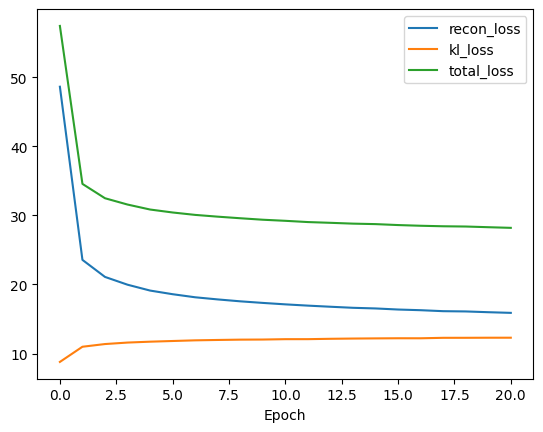

In [12]:
# Plot the training curves, which are stored in logs.history as a dict. Keys of
# this dict are the metric names, while the corresponding values are arrays.
fig, ax = plt.subplots()

for loss_name in ['recon_loss', 'kl_loss', 'total_loss']:
    loss_values = logs.history[loss_name]
    x = np.arange(len(loss_values))
    ax.plot(x, loss_values, label=loss_name)
    
ax.legend()
ax.set_xlabel('Epoch')
fig.savefig(os.path.join(output_dir, 'training_curves.png'), transparent=False)
# fig.show()

# Save the model 
model.save(os.path.join(output_dir, 'vae.keras'))


In [ ]:
model = model.load(os.path.join(output_dir, 'vae.keras'))